In [57]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

# Calculating PCA

1. Center the data (substract the mean)
    * Compute Covariance Matrix $\sum$
    * Find Eigen vectors and values of $\sum$
2. EigenVectors become the Principal Component
3. EigenValues provide the explained variance
4. Select new Dimensions and project the data
    

In [58]:
def corr_vars(start=10,stop=10,step=.5,mu=0,sigma=3,func=lambda x:x): 
    x = np.arange(start,stop,step)
    e = np.random.normal(mu,sigma,x.size) # to add noise
    y = np.zeros(x.size)
    for idx in range(x.size):
        y[idx] = func(x[idx]) + e[idx]
    return x,y

In [59]:
x1,x2 = corr_vars(start=2,stop=4,step=.2,sigma=2,
                 func = lambda x: 2* np.sin(x))
A = np.c_[x1,x2]

<IPython.core.display.Javascript object>


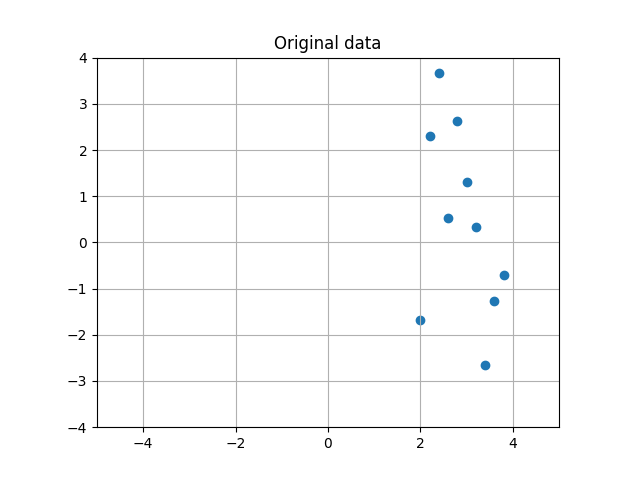

In [60]:
fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set_title('Original data')
ax.set_aspect('equal')
ax.grid(True)
plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

In [61]:
centered_A = A -np.mean(A,0)


<IPython.core.display.Javascript object>


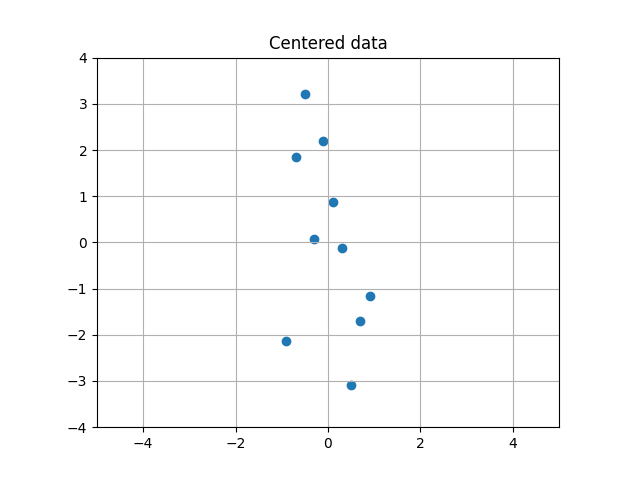

In [62]:
fig, ax = plt.subplots()
ax.scatter(centered_A[:,0],centered_A[:,1])
ax.set_title('Centered data')
ax.set_aspect('equal')
ax.grid(True)
plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

In [72]:
evecs, eigenval, V = np.linalg.svd(centered_A.T,full_matrices = False)

In [73]:
evecs

array([[-0.14027773,  0.9901122 ],
       [ 0.9901122 ,  0.14027773]])

<IPython.core.display.Javascript object>


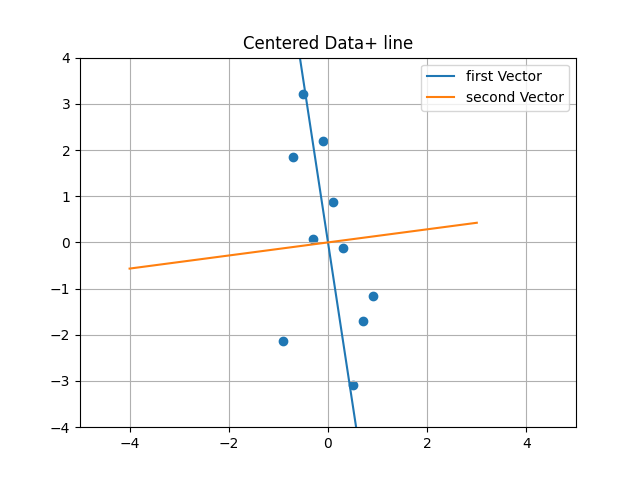

In [88]:
x ,y1,y2=[],[],[]
for i in range(-4,4):
    x.append(i)
    y1.append( evecs[1,0] * i / evecs[0,0] )
    y2.append( evecs[1,1] * i / evecs[0,1] ) # line from slope

fig,ax = plt.subplots()
ax.scatter(centered_A[:,0],centered_A[:,1])
ax.plot(x,y1,label = 'first Vector')
ax.plot(x,y2,label = 'second Vector')
ax.set_title('Centered Data+ line')
ax.grid(True)
plt.legend()
plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

<IPython.core.display.Javascript object>


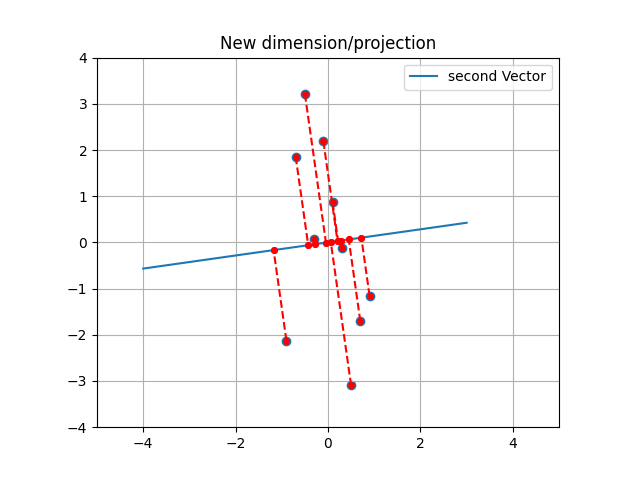

In [100]:
fig, ax = plt.subplots()
ax.scatter(centered_A[:,0],centered_A[:,1])
ax.set_title('New dimension/projection')
ax.set_aspect('equal')
ax.plot(x,y2,label = 'second Vector')
ax.grid(True)
plt.xlim([-5,5])
plt.ylim([-4,4])
p0 = [x[0],y[0]]
p1 = [x[-1],y[-1]]
a = np.array([[p1[0]-p0[0],p1[1]-p0[1]],
             [p0[1]-p1[1],p1[0]-p0[0]]])
plt.legend()
for i in range(0, len(centered_A)):
    q = centered_A[i]
    b = - np.array([-q[0]* (p1[0] - p0[0]) -q[1]* (p1[1] - p0[1]),
                   p0[0]* (p1[1] - p0[1]) -p0[1]* (p1[0] - p0[0])])
    proj = np.linalg.solve(a,b)
    ax.plot(proj[0],proj[1],'bo', markersize = 4, color = 'red')  
    ax.plot((q[0],proj[0]),(q[1],proj[1]),'bo', markersize = 4, color = 'red', linestyle = '--' )